In [1]:
# [1] - Fonte Nishiura, Hiroshi. 2006. Mathematical and Statistical Analyses of the Spread of Dengue. Dengue Bulletin 30: 51-67.

# [2] - A dengue pode ser contraída mais de uma vez?
# Ao contrair dengue, a pessoa fica imunizada permanentemente para aquele sorotipo do vírus, mas não para os outros. Dessa forma, uma mesma pessoa pode ter dengue até quatro vezes. A segunda infecção por qualquer sorotipo da dengue é, na maioria das vezes, mais grave do que a primeira, independentemente dos sorotipos e de sua seqüência. Contudo, o tipo 3 mostra-se mais virulento. É importante lembrar, porém, que manifestações mais graves da dengue podem ocorrer na primeira infecção.
# https://mosquito.saude.es.gov.br/mitos-e-verdades

# [3] - População  de  Aedes  aegypti  (l.)  em  áreaendêmica  de  dengue,  Sudeste  do  Brasil - 
# http://www.scielo.br/pdf/rsp/v35n3/5007.pdf

# [4] - https://www.scielosp.org/article/ssm/content/raw/?resource_ssm_path=/media/assets/ress/v25n4/2237-9622-ress-25-04-00725.pdf

# [5] - https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0049085
#
# O item 5 detalha novamente o modelo desenvolvido por:  Bailey NTJ (1975) The mathematical theory of infectious diseases and its applications. London: Griffin. 
# e relaciona a variação de seus parametros de forma detalhada que [1] e pode ser visto na tabela:
# https://journals.plos.org/plosone/article/figure?id=10.1371/journal.pone.0049085.t002

# [6] - http://portalarquivos2.saude.gov.br/images/pdf/2019/abril/30/informe-arboviroses-15.pdf

# [7] - https://brasilemsintese.ibge.gov.br/populacao/taxas-brutas-de-mortalidade.html

In [2]:
import scipy.integrate
import numpy
import matplotlib.pyplot as plt
import itertools

In [3]:
# The SIR-VECTOR model differential equations. [1]
def deriv(y, t, Nh, Bh, gamma, u_h, b, m, A, u_v, Bv):
    Sh, Ih, Rh, Sv, Iv = y
    dShdt = u_h*(Nh-Sh) - ((Bh * b)*(Sh * Iv)/(Nh + m))
    dIhdt = (Bh * b) * (Sh * Iv)/ (Nh + m)  - ((u_h + gamma) * Ih)
    dRhdt = (gamma * Ih) - (u_h * Rh)
    dSvdt = A - ((Bv *  b)*(Sv*Ih)/(Nh + m)) - (u_v * Sv)
    dIvdt = ((Bv * b)*(Sv*Ih)/(Nh+m)) - (u_v * Iv)
    return dShdt, dIhdt, dRhdt, dSvdt, dIvdt

In [4]:
# [1] Descreve "Here,   the   most   fundamental epidemiological parameter of population
# dynamics is discussed. Following Bailey’sanalysis, it is suggested that the product Nh Nv
# has to be larger than the product ρhρv"

# Então a ideia é variar relação entre a densidade de mosquitos e a população.
# Também é importante citar em [1] e procurar outras fontes:

# "where p is the final attack rate, the proportion of those who experienced infection 
# during an epidemic (note: precisely, p is not arate but a proportion). 
# R0 was estimated to beapproximately 1.3, from which it was concluded that the transmission
# potential of dengue isrelatively small, compared to other infectious diseases 
# (e.g., R0 for measles ranges from 9–16) and that dengue can be significantly 
# reduced by modest efforts



#######################################
# Estes valores foram retirados da tabela https://journals.plos.org/plosone/article/figure?id=10.1371/journal.pone.0049085.t002 
# e sua origem deve ser investigada com mais profundidade, para melhorar a bibliografia

# População da amostra
populacao = [100000] # 1k 10k 100k
# A, taxa constante de novos mosquitos que entram na população;
novos_mosquitos = [400, 800, 1600, 3200, 5000] # 400-5000 
# μv Mortalidade per capita dos mosquitos
mortalide_mosquitos = [0.1,  0.25] # 0.1 0.25

####################################

# Dados da região, no caso o Brasil todo.

# Casos registrados para cada 100 mil habitantes em 2018 
# [6]
infectados = 49.2 
# [7]
taxa_mortalidade = 6 / 1000


dias = [
    45, # 1
    40, # 2
    45, # 3
    35, # 4
    365, # 5
    35, # 6
    45, # 7
    35, # 8
    40, # 9
    40, # 10
    70, # 11
    90, # 12
    50, # 13
    60, # 14
    50, # 15
    60, # 16
    50, # 17
    50, # 18
    50, # 19
    40, # 20
    20, # 21
    20, # 22
    30, # 23
    60, # 24
    100, # 25
    30, # 26 
    70, # 27
    20, # 28
    60, # 29
    100, # 30
]

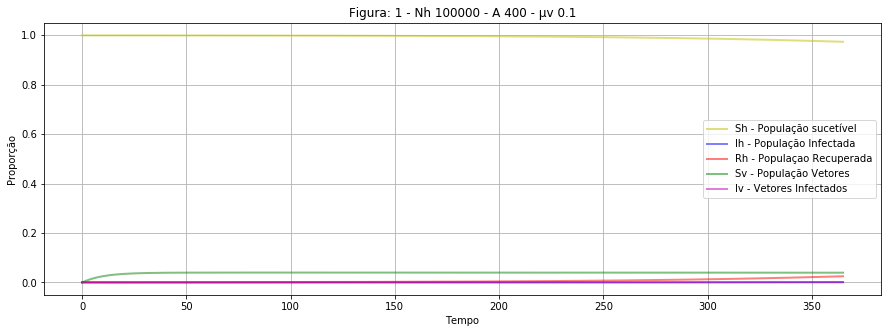

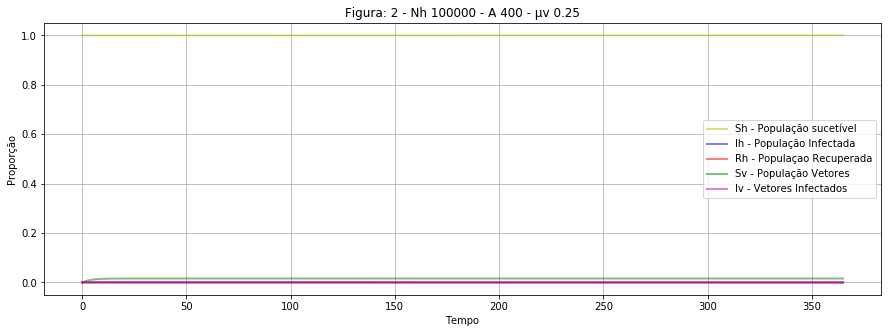

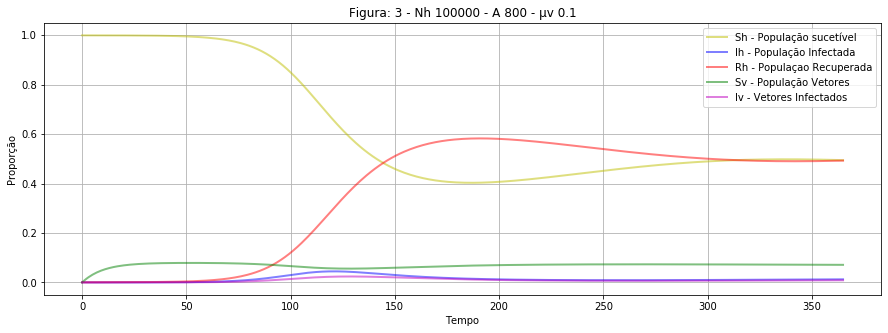

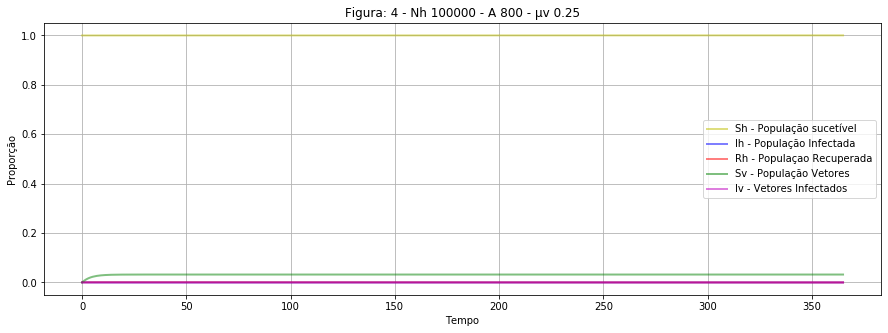

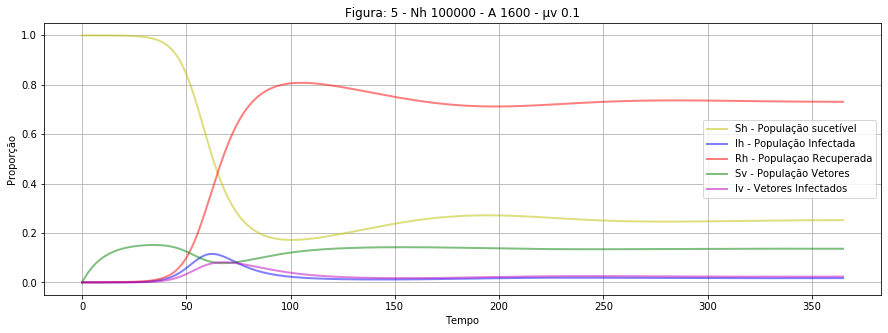

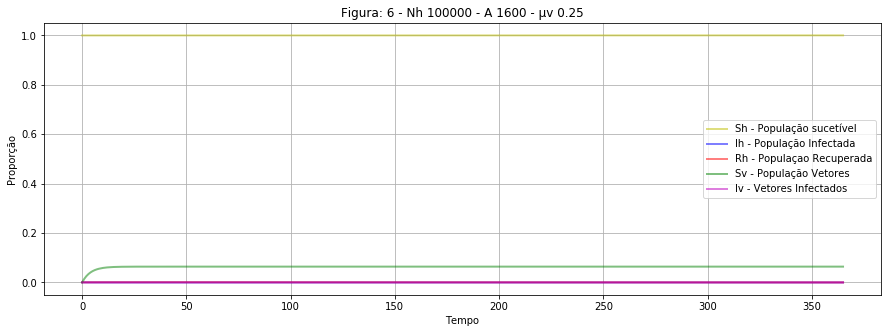

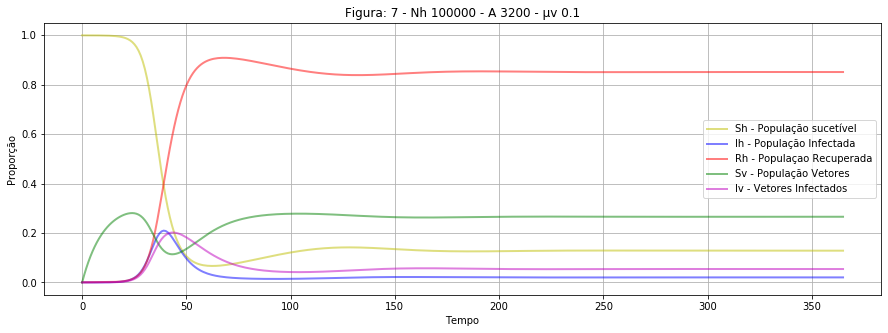

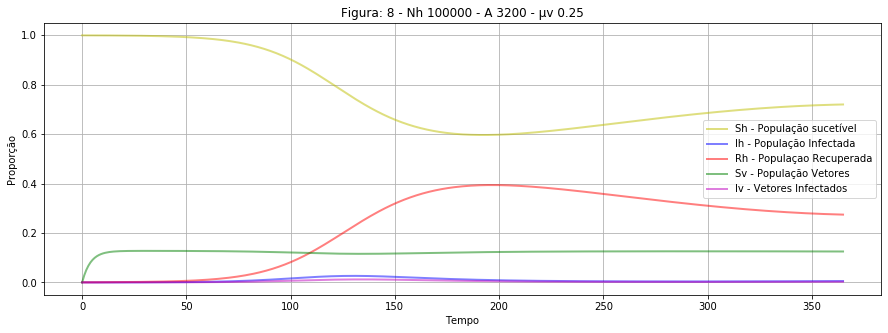

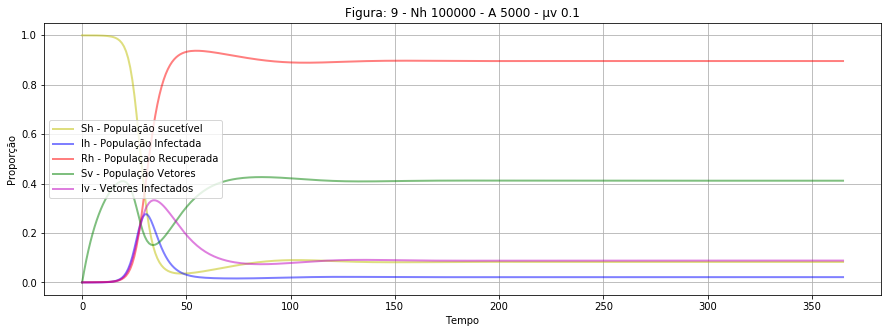

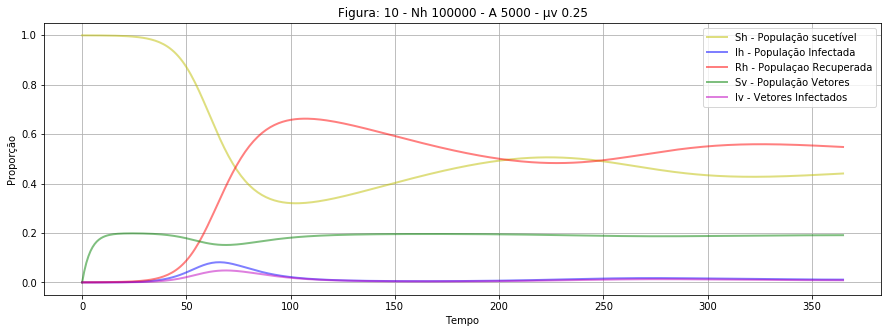

In [5]:
# Nh - População da amostra
# A, taxa constante de novos mosquitos que entram na população;
# μv Mortalidade per capita dos mosquitos

for idx, (Nh, A, u_v) in enumerate(itertools.product(populacao, novos_mosquitos, mortalide_mosquitos)):
    
    # βh Probabilidade de transmissão do Vetor -> Humanos
    Bh = 0.75 # 0.1 - 0.75
    # Taxa de humanos infectados que se recuperam e ficam imunes a doença;
    gamma = 0.25 # [2]
    # μh Taxa percapita de mortalidade dos humanos não relacionado a doença
    u_h = taxa_mortalidade
    # b, Quantas vezes por dia um mosquito morde as pessoas.
    b = 1 # 0.3-1
    # m, Numero dos hospediros alternativos;
    m = 0 # [1]
    # βv Probabilidade de transmissão Humano -> Vetor
    Bv = 1 # 0.5-1
    # Infected Humans: Número de individuos infectados quando o modelo começou a rodar;
    Ih = infectados 
    # Número de individuos recuperados no inicio da execução do modelo;
    Rh = infectados 
    # Susceptible Vectors: O número de vetores suscetíveis no início da execução do modelo.
    Sv = 0
    # Infected Vector: O número de vetores infectados no início da execução do modelo.
    Iv = 0
    # Initial: Numero dos humanos sucetiveis no inicio do modelo
    Sh = Nh - Ih

    t = numpy.linspace(0, 365, 365)
    
    y0 = Sh, Ih, Rh, Sv, Iv # Vetor de condições inciais
    args = Nh, Bh, gamma, u_h, b, m, A, u_v, Bv
    # Integrate the SIR equations over the time grid, t.
    ret = scipy.integrate.odeint(deriv, y0, t, args=args)
    Sh, Ih, Rh, Sv, Iv = ret.T
    
    plt.figure(figsize=[15,5])
    plt.plot(t, Sh/Nh, 'y', alpha=0.5, lw=2, label='Sh - População sucetível')
    plt.plot(t, Ih/Nh, 'b', alpha=0.5, lw=2, label='Ih - População Infectada')
    plt.plot(t, Rh/Nh, 'r', alpha=0.5, lw=2, label='Rh - Populaçao Recuperada')
    plt.plot(t, Sv/Nh, 'g', alpha=0.5, lw=2, label='Sv - População Vetores')
    plt.plot(t, Iv/Nh, 'm', alpha=0.5, lw=2, label='Iv - Vetores Infectados')
    plt.grid()
    plt.legend()
    plt.xlabel("Tempo")
    plt.ylabel("Proporção")
    plt.title("Figura: {} - Nh {} - A {} - μv {}".format(idx+1, Nh, A, u_v))
    plt.show()